In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

datas = pd.read_csv("PSante_04_app_products.csv", encoding="utf-8")
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114720 entries, 0 to 114719
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   brands                   114720 non-null  object 
 1   manufacturing_places     114720 non-null  object 
 2   countries                114720 non-null  object 
 3   origins                  114720 non-null  object 
 4   product_name             114720 non-null  object 
 5   nutriscore_grade         85490 non-null   object 
 6   energy_100g              95664 non-null   float64
 7   saturated-fat_100g       93105 non-null   float64
 8   fiber_100g               52113 non-null   float64
 9   proteins_100g            95898 non-null   float64
 10  sodium_100g              94542 non-null   float64
 11  nutrition-score-fr_100g  85492 non-null   float64
dtypes: float64(6), object(6)
memory usage: 10.5+ MB


Maintenant, je vais analyser les variables 6 à 11 et les compléter ce qui me permettra enfin de m'occuper de nutriscore_grade qui est directement définie grâce à nutrition-score-fr_100g

Je vais commencer par afficher un histogramme avec les valeurs des moyennes +- 1 à 3 écart-types et les quartiles

In [2]:
cols = ["energy_100g", "saturated-fat_100g", "fiber_100g", "proteins_100g", "sodium_100g", "nutrition-score-fr_100g"]

In [3]:
import math
from scipy import stats

def graph(data, colonnes):
    
    for col in colonnes:
        print(f"Etude de {col}:\n")

        val_notnull = data[data[col].isnull() == False][col]
        
        moy = val_notnull.mean()
        std_val = val_notnull.std(ddof=0)
        print(f"Moyenne = {moy}\nEcart-type = {std_val}\nCoef de Variation = {std_val/moy}")
        perc_moy = round(stats.percentileofscore(val_notnull, moy))
        print(f"Percentile à la moyenne:\n\t{perc_moy}% < à moyenne\n\t{100-perc_moy}% > à moyenne")
        perc_moy = round(stats.percentileofscore(val_notnull, moy + std_val))
        calcul = val_notnull.quantile(perc_moy/100)
        print(f"Percentile à la moyenne + 1Std:\n\t{perc_moy}% < à moyenne+1Std\n\t{100-perc_moy}% > à moyenne+1Std\n"
            f"\tValeur à moyenne+1std: {calcul}")
        perc = round((val_notnull.quantile(perc_moy/100) - val_notnull.min()) / (val_notnull.max() - val_notnull.min()) * 100, 3)
        print(f"{perc_moy} % des individus se répartissent sur {perc} % de l'intervalle")
        conc = ((perc_moy / 100) * len(val_notnull)) / (perc / 100)
        print(f"Concentration intervalle: {conc}")
        conc1 = (((100 -perc_moy) / 100) * len(val_notnull)) / ((100 - perc) / 100)
        print(f"Concentration hors intervalle: {conc1}")

        print(f"Proba: {conc / (conc + conc1)}")

        print(f"Ratio de concentration: {conc / conc1}")

        moy_liste = []
        for i in range(-3,4):
            moy_liste.append(moy + i * std_val)

        quartiles = val_notnull.quantile([0.25, 0.5, 0.75])
        for i in range(3):
            print(f"Quantile {i + 1} = {quartiles.iloc[i]}")

        nb_classes = round(1 + math.log2(len(val_notnull.index))) 
        print("Nombre de classe: ", nb_classes)
        ampl_classes = round((val_notnull.max() - val_notnull.min()) / nb_classes)
        print(f"L'amplitude de classe est: {ampl_classes}")

        bins = pd.cut(val_notnull, nb_classes)
        mode = bins.mode()
        print("classe modale: ", mode[0])

        compte_classes = val_notnull.groupby(bins).agg(['count'])
        effectif_modal = compte_classes.loc[mode[0]]["count"]
        print("effectif de la classe modale=", effectif_modal)

        colors = {0: ["b", "Moy"], 1: ["g", "Moy+/-1Std"], 2: ["y", "Moy+/-2Std"], 3: ["k", "Moy+/-3Std"]}
        for num, value in enumerate(moy_liste):
            if val_notnull.min() <= value <= val_notnull.max():
                plt.axvline(value, linestyle="-", color=colors[math.fabs(num-3)][0] , label=colors[math.fabs(num-3)][1])

        for num, value in enumerate(quartiles.values):
            plt.axvline(value, linestyle="--" , color="r" , label=f"Quartile {num+1}")

        plt.legend()
        val_notnull.hist(bins=nb_classes, figsize=(10, 10))
        plt.show() 

        print("\n")

        if col in "energy_100g":
            cl_count = compte_classes
    return cl_count
       


Etude de energy_100g:

Moyenne = 1075.6704478123431
Ecart-type = 759.3547225073628
Coef de Variation = 0.7059362131326644
Percentile à la moyenne:
	54% < à moyenne
	46% > à moyenne
Percentile à la moyenne + 1Std:
	82% < à moyenne+1Std
	18% > à moyenne+1Std
	Valeur à moyenne+1std: 1820.0
82 % des individus se répartissent sur 48.34 % de l'intervalle
Concentration intervalle: 162276.5411667356
Concentration hors intervalle: 33332.40418118468
Proba: 0.8295967287084037
Ratio de concentration: 4.868431940422009
Quantile 1 = 418.0
Quantile 2 = 983.0
Quantile 3 = 1602.0
Nombre de classe:  18
L'amplitude de classe est: 209
classe modale:  (-3.765, 209.167]
effectif de la classe modale= 12549


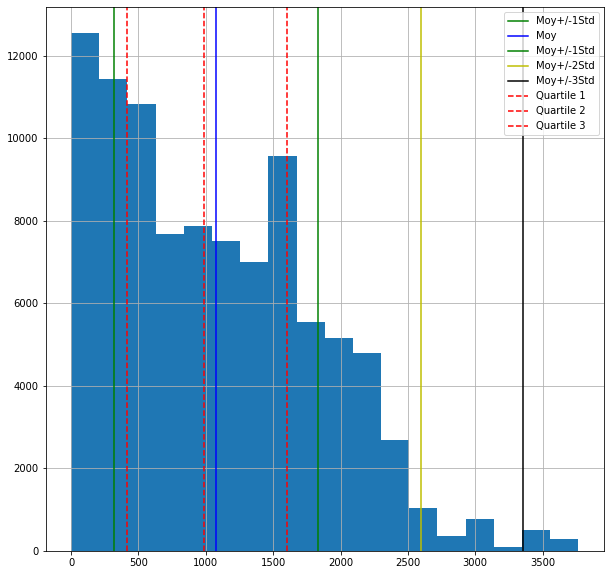



Etude de saturated-fat_100g:

Moyenne = 5.435069820150735
Ecart-type = 8.212624388013714
Coef de Variation = 1.511043033442751
Percentile à la moyenne:
	69% < à moyenne
	31% > à moyenne
Percentile à la moyenne + 1Std:
	86% < à moyenne+1Std
	14% > à moyenne+1Std
	Valeur à moyenne+1std: 13.8
86 % des individus se répartissent sur 13.8 % de l'intervalle
Concentration intervalle: 580219.5652173912
Concentration hors intervalle: 15121.461716937356
Proba: 0.9746003365586874
Ratio de concentration: 38.370600414078666
Quantile 1 = 0.3
Quantile 2 = 2.0
Quantile 3 = 7.5
Nombre de classe:  18
L'amplitude de classe est: 6
classe modale:  (-0.1, 5.556]
effectif de la classe modale= 64841


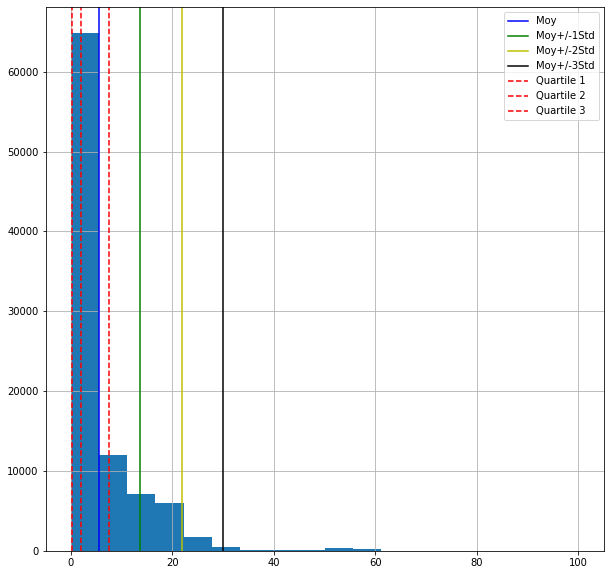



Etude de fiber_100g:

Moyenne = 2.9715242178649017
Ecart-type = 4.944243975605193
Coef de Variation = 1.66387470304978
Percentile à la moyenne:
	67% < à moyenne
	33% > à moyenne
Percentile à la moyenne + 1Std:
	91% < à moyenne+1Std
	9% > à moyenne+1Std
	Valeur à moyenne+1std: 7.9
91 % des individus se répartissent sur 7.9 % de l'intervalle
Concentration intervalle: 600288.9873417722
Concentration hors intervalle: 5092.475570032574
Proba: 0.99158798892596
Ratio de concentration: 117.87763713080167
Quantile 1 = 0.133
Quantile 2 = 1.64
Quantile 3 = 3.6
Nombre de classe:  17
L'amplitude de classe est: 6
classe modale:  (-0.1, 5.882]
effectif de la classe modale= 44483


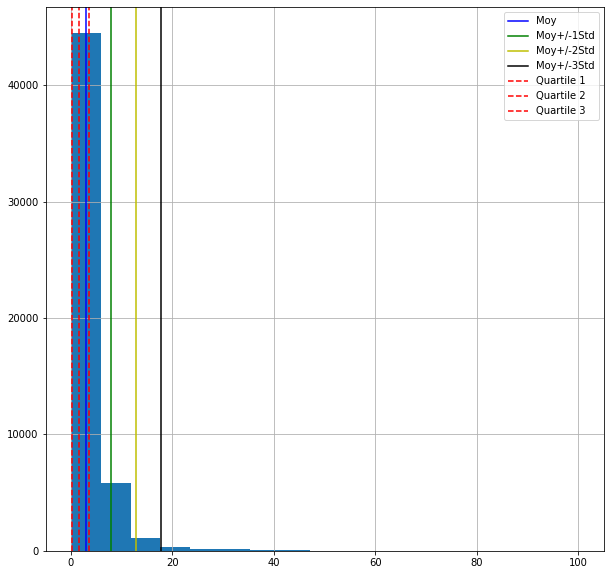



Etude de proteins_100g:

Moyenne = 8.231209572787716
Ecart-type = 8.303367443000143
Coef de Variation = 1.00876637504784
Percentile à la moyenne:
	63% < à moyenne
	37% > à moyenne
Percentile à la moyenne + 1Std:
	85% < à moyenne+1Std
	15% > à moyenne+1Std
	Valeur à moyenne+1std: 16.8
85 % des individus se répartissent sur 16.8 % de l'intervalle
Concentration intervalle: 485198.21428571426
Concentration hors intervalle: 17289.302884615383
Proba: 0.965592572364828
Ratio de concentration: 28.063492063492063
Quantile 1 = 2.1
Quantile 2 = 6.0
Quantile 3 = 12.0
Nombre de classe:  18
L'amplitude de classe est: 6
classe modale:  (-0.1, 5.556]
effectif de la classe modale= 44403


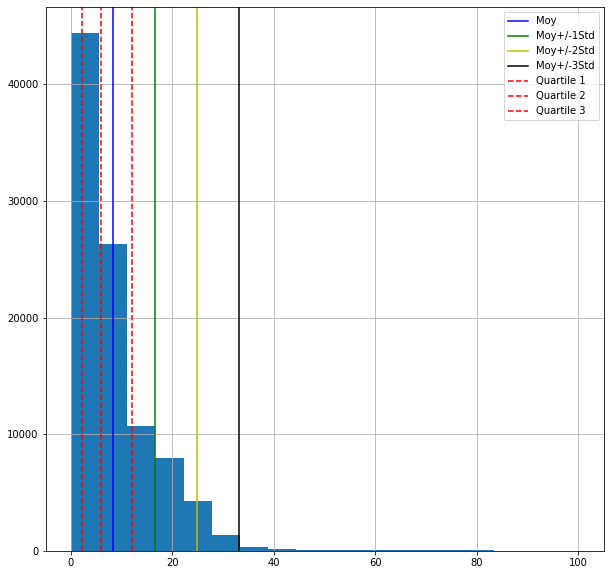



Etude de sodium_100g:

Moyenne = 0.5115500007419767
Ecart-type = 2.277908654809209
Coef de Variation = 4.452954064129061
Percentile à la moyenne:
	75% < à moyenne
	25% > à moyenne
Percentile à la moyenne + 1Std:
	99% < à moyenne+1Std
	1% > à moyenne+1Std
	Valeur à moyenne+1std: 4.678209074986525
99 % des individus se répartissent sur 4.678 % de l'intervalle
Concentration intervalle: 2000781.958101753
Concentration hors intervalle: 991.8172090388368
Proba: 0.999504530820979
Ratio de concentration: 2017.2890123984607
Quantile 1 = 0.032
Quantile 2 = 0.2
Quantile 3 = 0.52
Nombre de classe:  18
L'amplitude de classe est: 6
classe modale:  (-0.1, 5.556]
effectif de la classe modale= 93735


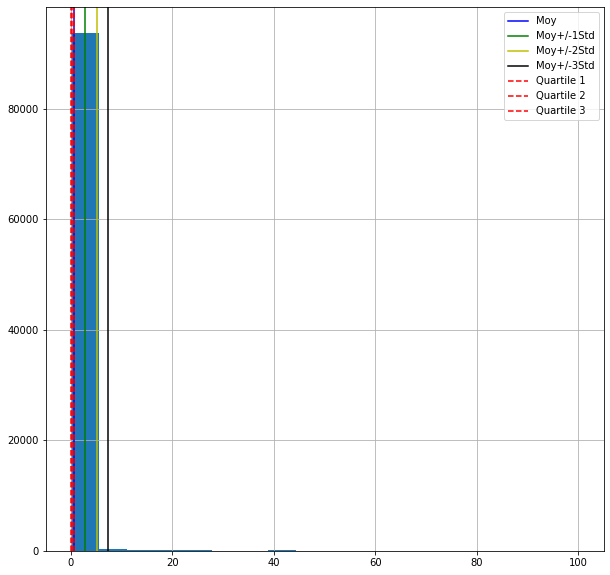



Etude de nutrition-score-fr_100g:

Moyenne = 8.430975997754176
Ecart-type = 8.96319204827308
Coef de Variation = 1.0631262680217182
Percentile à la moyenne:
	52% < à moyenne
	48% > à moyenne
Percentile à la moyenne + 1Std:
	82% < à moyenne+1Std
	18% > à moyenne+1Std
	Valeur à moyenne+1std: 18.0
82 % des individus se répartissent sur 62.264 % de l'intervalle
Concentration intervalle: 112590.6462803546
Concentration hors intervalle: 40779.520881916476
Proba: 0.7341104750914805
Ratio de concentration: 2.7609604979513747
Quantile 1 = 1.0
Quantile 2 = 8.0
Quantile 3 = 15.0
Nombre de classe:  17
L'amplitude de classe est: 3
classe modale:  (0.588, 3.706]
effectif de la classe modale= 12387


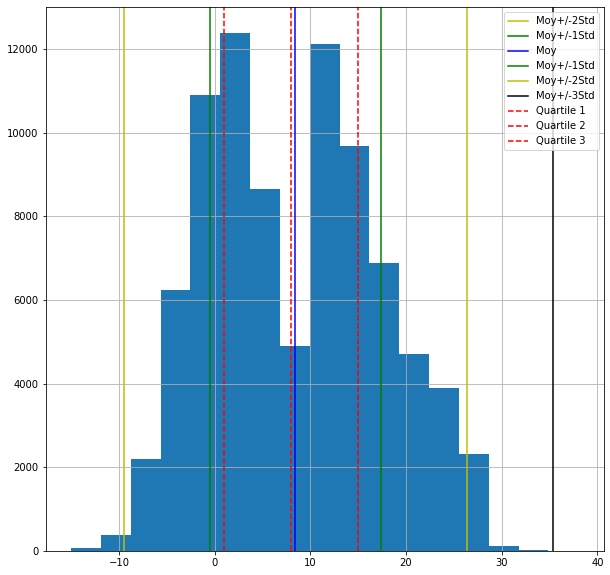

In [4]:
compte_classes = graph(datas, cols)

Maintenant que je connais la structure des variables, je vais essayer de retrouver la même en générant des valeurs aléatoires pour compléter les valeurs manquantes

In [5]:
# truc = datas[datas["energy_100g"].notna() == True]["energy_100g"]
truc = datas[datas["saturated-fat_100g"].notna() == True]["saturated-fat_100g"]

def r2_coef(y_true, y_pred):
    u = ((y_true - y_pred) ** 2).sum()
    v = ((y_true - y_true.mean()) ** 2).sum()
    # print(f"u: {u}")
    # print(f"v: {v}")
    # print(f"u/v: {u/v}")
    return 1 - (u/v)



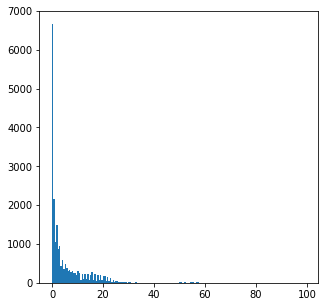

In [6]:

nb_values = len(truc.index)
# print(f"nb val non null: {nb_values}")
nb_val_null = len(datas.index) - nb_values
# print(f"nb val null: {nb_val_null}")

bins_path = round(1 + math.log2(nb_values)) * 10

hist, bins = np.histogram(truc, bins=bins_path, density=False)
hist_prob, bins = np.histogram(truc, bins=bins_path, density=True)
p_train = hist_prob * np.diff(bins)
# print(f"Bins = {bins[:5]}")

ampl_classes = round((truc.max() - truc.min()) / bins_path, 3)
# print(f"Amplitude = {ampl_classes}")
ampl2 = ampl_classes / 2
# print(f"Centre classe +/- {ampl2}")

centre_cl = bins[:-1] + ampl2
# print(f"Centre classes = {len(centre_cl)}")

result = np.random.choice(centre_cl, nb_val_null, p= p_train)
# print("centre aléa: ",result)

rints = np.array([np.random.uniform(low= x-ampl2, high= x+ampl2) for x in result]).round(1)
p_hist, p_bins = np.histogram(rints, bins=bins_path, density=False)
p_hist_prob, p_bins = np.histogram(rints, bins=bins_path, density=True)
p_test = p_hist_prob * np.diff(p_bins)

n_hist = (p_hist * nb_values / nb_val_null).astype(int)
# p_pred = 
# print("valeurs aléa", len(p_hist))

plt.figure(figsize=(5,5))
plt.hist(rints, bins=bins_path)
plt.show()


nb classes: 180 ** nb val hist: 180
[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     2     2
     2     2     2     2     2     2     2     2     2     3     3     3
     3     3     3     3     4     4     4     4     4     4     4     4
     5     5     5     5     5     5     5     6     6     6     7     7
     7     8     9     9    11    14    14    16    18    19    19    21
    23    24    24    25    27    30    30    33    35    35    36    37
    37    37    43    46    46    52    55    56    61    61    81   102
   115   124   135   137   139   180   184   205   228   240   245   253
   289   311   312   340   515   590   687   740   876   897   969   994
  1034  1035  1

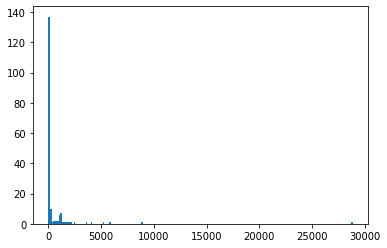

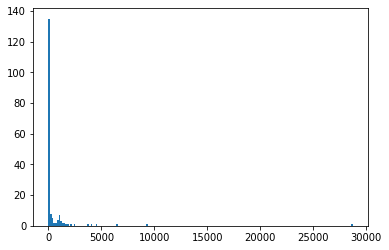

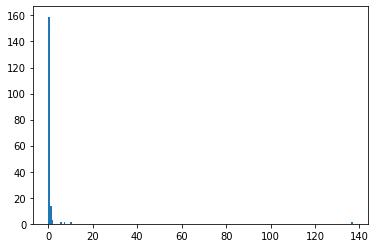

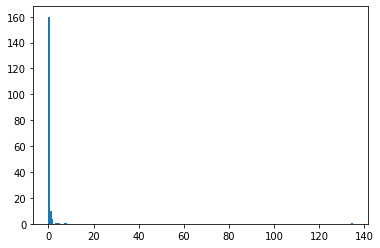

In [7]:
bins_path2 = round(1 + math.log2(len(hist))) *5

_hist, _bins = np.histogram(hist, bins=bins_path, density=False)
_phist, _pbins = np.histogram(p_hist, bins=bins_path, density=False)


print(f"nb classes: {bins_path} ** nb val hist: {len(hist)}")
print(np.sort(hist))
# plt.figure(figsize=(10,10))
# print(f"hist: {max(hist)}")
# print(f"hist dist: {hist[:10]}")
plt.hist(hist, bins=bins_path)
plt.show()

# plt.figure(figsize=(10,10))
# print(f"p_hist: {max(p_hist)}")
# print(f"p_hist dist: {p_hist[:10]}")
plt.hist(n_hist, bins=bins_path)
plt.show()

plt.hist(_hist, bins=bins_path)
plt.show()
plt.hist(_phist, bins=bins_path)
plt.show()


In [8]:
print(f"R2 val hist: {r2_coef(hist, n_hist)}")
print(f"R2 val prob: {r2_coef(p_train, p_test)}")

print(f"R2 compare dist: {r2_coef(_hist, _phist)}")

R2 val hist: 0.9980588704418684
R2 val prob: 0.9980584992657876
R2 compare dist: 0.9970212765957447


In [9]:
colonnes = ["energy_100g", "saturated-fat_100g", "fiber_100g", "proteins_100g", "sodium_100g"]

def complete(datas, cols):

    for col in cols:
        val_notna = datas[datas[col].notna() == True][col]
        val_na = pd.DataFrame(datas[datas[col].isnull() == True][col])
        
        nb_values = len(val_notna.index)
        bins_path = round(1 + math.log2(nb_values)) * 5

        hist, bins = np.histogram(val_notna, bins=bins_path, density=False)
        
        ampl_classes = round((val_notna.max() - val_notna.min()) / bins_path, 3)
        ampl2 = ampl_classes / 2
        centre_cl = bins[:-1] + ampl2
        
        result = np.random.choice(centre_cl, len(datas[datas[col].isnull() == True]), p= hist / nb_values)

        val_na.loc[:,col] = np.array([np.random.uniform(low= x-ampl2, high= x+ampl2) for x in result]).round(1)
        
        datas[col] = datas[col].mask(datas[col].isnull(), val_na[col])
        
    return datas


In [10]:
datas = complete(datas, colonnes)


Covariance et PCA des mêmes variables pour voir leurs corrélations afin de compléter nutrition-score-fr_100g par régression linéaire

In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

scaled = pd.DataFrame(sc.fit_transform(datas[cols]), columns=cols)

datas_RegNotNA = scaled[scaled["nutrition-score-fr_100g"].notna() == True][cols]
datas_RegNA = scaled[scaled["nutrition-score-fr_100g"].notna() == False][cols]


In [12]:
datas_RegNotNA.corr()

,energy_100g,saturated-fat_100g,fiber_100g,proteins_100g,sodium_100g,nutrition-score-fr_100g
energy_100g,1.000000,0.601001,0.134512,0.198817,-0.015989,0.588804
saturated-fat_100g,0.601001,1.000000,0.000408,0.138056,0.002419,0.610131
fiber_100g,0.134512,0.000408,1.000000,0.097890,-0.000473,-0.074900
proteins_100g,0.198817,0.138056,0.097890,1.000000,0.085050,0.096638
sodium_100g,-0.015989,0.002419,-0.000473,0.085050,1.000000,0.112446
nutrition-score-fr_100g,0.588804,0.610131,-0.074900,0.096638,0.112446,1.000000


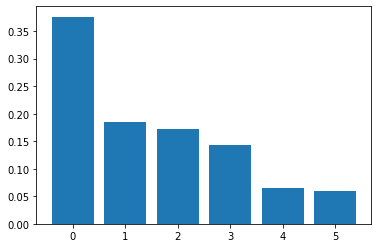

In [13]:
import prince

pca = prince.PCA(n_components=6, rescale_with_std=True, rescale_with_mean=True, copy=True, engine="auto", random_state=42)
pca = pca.fit(datas_RegNotNA)
pca.transform(datas_RegNotNA)
inertia = pca.explained_inertia_

plt.bar([x for x in range(len(inertia))], inertia)
plt.show()


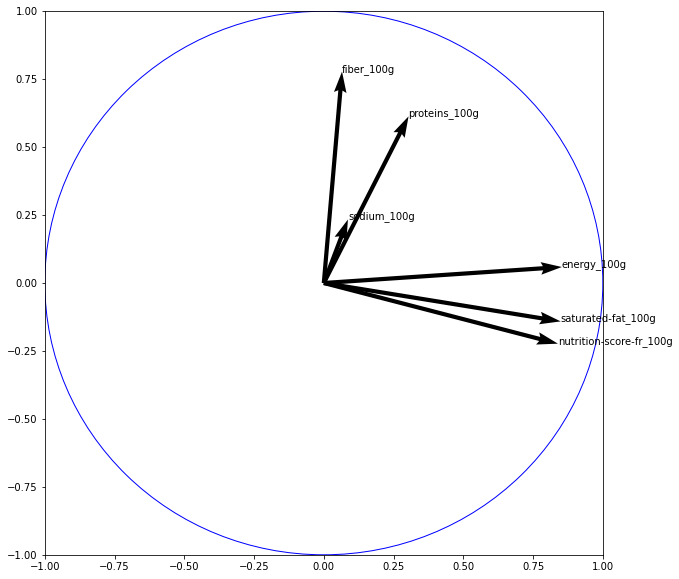

In [14]:
correl = pca.column_correlations(datas_RegNotNA)

fig, ax = plt.subplots(figsize=(10,10))
plt.quiver(np.zeros(correl.shape[0]), np.zeros(correl.shape[0]), correl[0], correl[1], angles='xy', scale_units='xy', scale=1,)
for i, nom in enumerate(correl.index):
    plt.text(correl.iloc[i,0], correl.iloc[i,1], nom)
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)
plt.xlim(-1,1)
plt.ylim(-1,1)

plt.show()


In [15]:
correl[0]

energy_100g                0.853125
fiber_100g                 0.065204
nutrition-score-fr_100g    0.839124
proteins_100g              0.303698
saturated-fat_100g         0.848974
sodium_100g                0.086394
Name: 0, dtype: float64

D'après la matrice de corrélation et la PCA, on peut voir que nutrition-score-fr_100g est fortement corrélé à energy_100g et saturated-fat_100g

La corrélation avec proteins_100g est faible mais pas négligeable

sodium_100g et fiber_100g ne sont pas corrélé avec nutrition-score-fr_100g

Je peux utiliser ces variables sans inquiétudes pour compléter nutrition-score-fr_100g

Je prendrai quand même en compte sodium_100g et fiber_100g car ils sont officiellement pris en compte dans le calcul

In [16]:
import joblib
from sklearn.linear_model import LinearRegression

cols2 = ["energy_100g", "saturated-fat_100g", "proteins_100g"]

with joblib.parallel_backend("loky", n_jobs=4):
    for num, col in enumerate([colonnes, cols2]):
        X_notna = datas_RegNotNA[col]
        Y_notna = datas_RegNotNA["nutrition-score-fr_100g"]

        reg = LinearRegression()
        reg.fit(X_notna, Y_notna)
        print(f"{num}/ R² = {reg.score(X_notna, Y_notna)}")


0/ R² = 0.479449684355432
1/ R² = 0.45030077081005737


La régression linéaire n'est pas convainquante, je vais essayer le KNN

In [17]:
from sklearn.model_selection import train_test_split
cible = "nutrition-score-fr_100g"

from sklearn import neighbors
from dask.distributed import Client

client = Client(memory_limit="4GB", processes=False, n_workers=2, threads_per_worker=4, silence_logs="error")

n_neighb = 0
weight = ""
boolean = True
min_error = 0
numero = 0
with joblib.parallel_backend("dask"):
    for num, col in enumerate([colonnes, cols2]):
        print(f"***** {num+1}/ *****")
        xtrain, xtest, ytrain, ytest = train_test_split(datas_RegNotNA[col], datas_RegNotNA[cible], train_size=0.8)
        for w in ["uniform", "distance"]:
            errors = []
            print(f"KNeighbor Regressor, weight => {w}")
            for k in range(2,100):
                knn = neighbors.KNeighborsRegressor(n_neighbors=k, weights=w)
                errors.append(100*(1 -knn.fit(xtrain, ytrain).score(xtest, ytest)))
            k = errors.index(min(errors)) +2
            print(f"le nombre de neighbors optimal est {k} à {min(errors)}")
            plt.plot(range(2,100), errors, 'o-')
            plt.show()
            if boolean:
                n_neighb = k
                weight = w
                boolean = False
                min_error = min(errors)
                numero = num
            else:
                if min(errors) < min_error:
                    n_neighb = k
                    weight = w
                    min_error = min(errors)
                    numero = num
        

***** 1/ *****
KNeighbor Regressor, weight => uniform


In [ ]:
print(f"Resultats:\nSet de colonnes n° {numero}\nNb de neighbors: {n_neighb}\nWeight: {weight}\nErreur: {min_error}")


In [ ]:
with joblib.parallel_backend("dask"):
    datas_to_pred = datas_RegNA[colonnes]

    xtrain, xtest, ytrain, ytest = train_test_split(datas_RegNotNA[colonnes], datas_RegNotNA[cible], train_size=0.8)
    
    knn = neighbors.KNeighborsRegressor(n_neighbors=n_neighb, weights=weight)
    knn.fit(xtrain, ytrain)
    pred = knn.predict(datas_to_pred)

In [ ]:
datas_RegNA["nutrition-score-fr_100g"] = pred
result_datas = pd.DataFrame(sc.inverse_transform(datas_RegNA), columns=datas_RegNA.columns, index=datas_RegNA.index)
result_datas["nutrition-score-fr_100g"] = result_datas["nutrition-score-fr_100g"].round(0)


In [ ]:
datas_copy = datas.copy()
datas_copy["nutrition-score-fr_100g"] = datas_copy["nutrition-score-fr_100g"].mask(datas_copy["nutrition-score-fr_100g"].isnull(),
    result_datas["nutrition-score-fr_100g"])

In [ ]:
datas_copy.loc[(datas_copy["nutriscore_grade"].isnull() == True) & (datas_copy["nutrition-score-fr_100g"] <= -1), "nutriscore_grade"] = "a"
datas_copy.loc[(datas_copy["nutriscore_grade"].isnull() == True) & (datas_copy["nutrition-score-fr_100g"] >= 0) & 
    (datas_copy["nutrition-score-fr_100g"] <= 2), "nutriscore_grade"] = "b"
datas_copy.loc[(datas_copy["nutriscore_grade"].isnull() == True) & (datas_copy["nutrition-score-fr_100g"] >= 3) & 
    (datas_copy["nutrition-score-fr_100g"] <= 10), "nutriscore_grade"] = "c"
datas_copy.loc[(datas_copy["nutriscore_grade"].isnull() == True) & (datas_copy["nutrition-score-fr_100g"] >= 11) & 
    (datas_copy["nutrition-score-fr_100g"] <= 18), "nutriscore_grade"] = "d"
datas_copy.loc[(datas_copy["nutriscore_grade"].isnull() == True) & (datas_copy["nutrition-score-fr_100g"] >= 19), "nutriscore_grade"] = "e"

In [ ]:
datas_copy

In [ ]:
# datas_copy.to_csv("PSante_06_app_products.csv", index=False, encoding="utf-8")